<a href="https://colab.research.google.com/github/uca-spider/EDA_IMDb/blob/main/imdb_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Mengatur style visualisasi yang modern dan jelas
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Load dataset dari file yang diunduh dari Kaggle
# Nama file biasanya 'imdb_top_1000.csv'
df = pd.read_csv('/content/drive/MyDrive/colab/imdb_top_1000.csv')

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print("Dimensi Data:", df.shape)
print("\nContoh 5 Baris Pertama:")
df.head()

Mounted at /content/drive
Informasi Dataset:
Dimensi Data: (1000, 16)

Contoh 5 Baris Pertama:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Melihat tipe data dan kolom non-null
print("\nInformasi Tipe Data:")
df.info()

# Mengecek jumlah missing values di setiap kolom
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB

Jumlah Missing

In [4]:
# Menangani 'Runtime' (menghapus " min" dan mengubah ke integer)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Menangani 'Gross' (menghapus koma dan mengubah ke integer)
# Kita akan buat kolom baru agar tidak kehilangan data asli saat analisis lain
df_gross_cleaned = df.dropna(subset=['Gross']).copy()
df_gross_cleaned['Gross'] = df_gross_cleaned['Gross'].str.replace(',', '').astype(int)

# Menangani 'Meta_score' (mengisi missing values dengan median)
median_meta_score = df['Meta_score'].median()
df['Meta_score'] = df['Meta_score'].fillna(median_meta_score)

# Menangani 'Certificate' (mengisi missing values dengan modus)
mode_certificate = df['Certificate'].mode()[0]
df['Certificate'] = df['Certificate'].fillna(mode_certificate)

print("\nData setelah beberapa pembersihan:")
df.info()


Data setelah beberapa pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


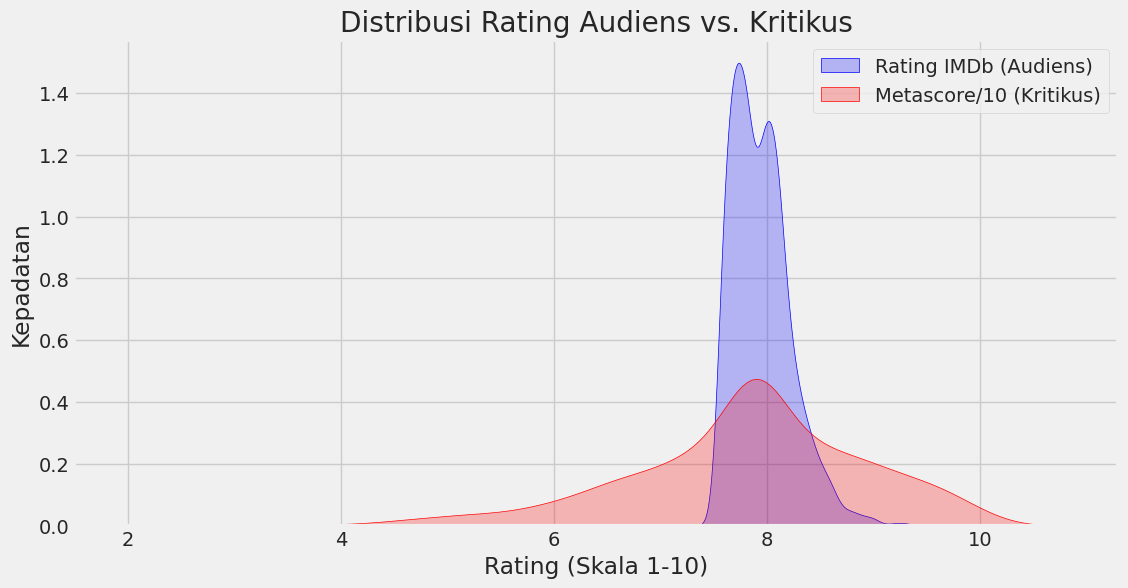

In [5]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['IMDB_Rating'], label='Rating IMDb (Audiens)', fill=True, color='blue')
sns.kdeplot(df['Meta_score'] / 10, label='Metascore/10 (Kritikus)', fill=True, color='red')
plt.title('Distribusi Rating Audiens vs. Kritikus')
plt.xlabel('Rating (Skala 1-10)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

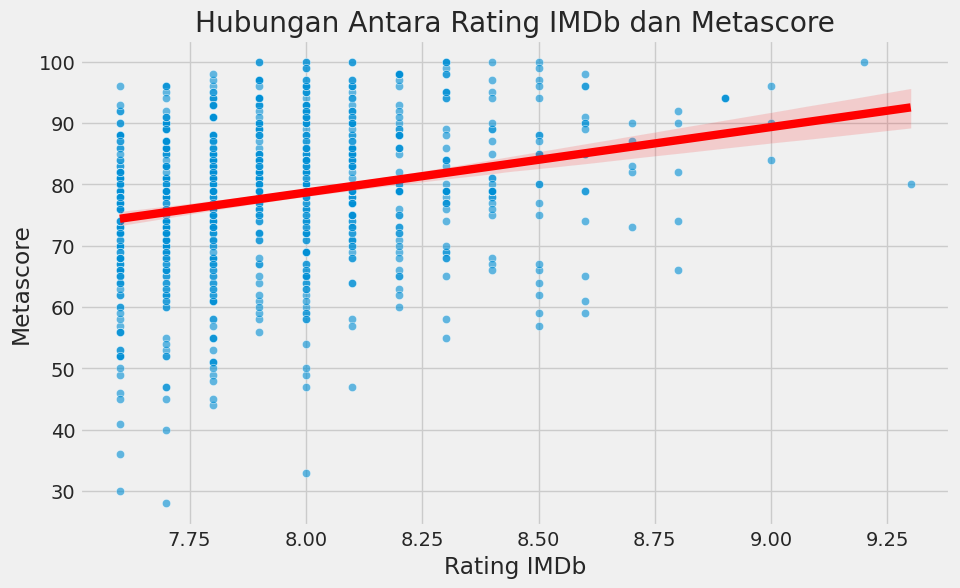

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df, alpha=0.6)
# Tambahkan garis regresi untuk melihat tren
sns.regplot(x='IMDB_Rating', y='Meta_score', data=df, scatter=False, color='red')
plt.title('Hubungan Antara Rating IMDb dan Metascore')
plt.xlabel('Rating IMDb')
plt.ylabel('Metascore')
plt.show()

/tmp/ipython-input-12-3107243966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='plasma', legend=False)


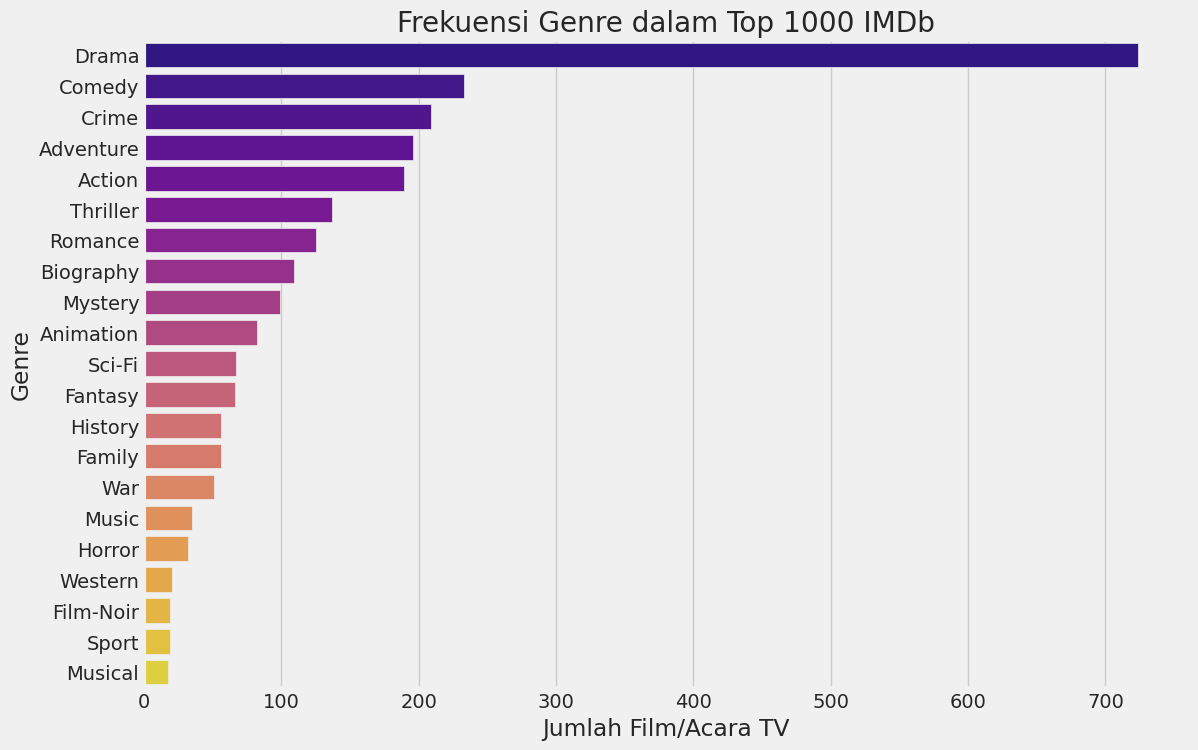

In [12]:
# Menggunakan logika 'explode' yang sama seperti sebelumnya
genre_counts = df['Genre'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='plasma', legend=False)
plt.title('Frekuensi Genre dalam Top 1000 IMDb')
plt.xlabel('Jumlah Film/Acara TV')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-8-4054225263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Certificate'].isin(top_certificates)], x='Certificate', y='IMDB_Rating', palette='crest', legend=False)


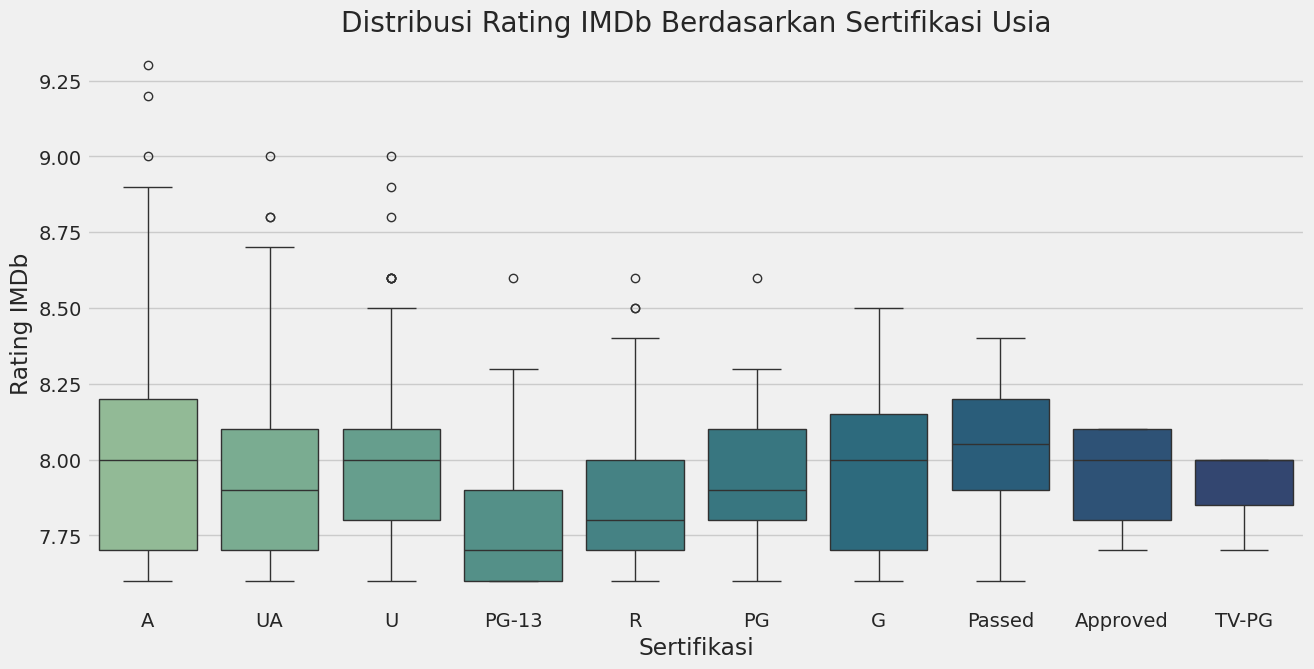

In [8]:
# Karena ada banyak jenis sertifikat, kita ambil 10 teratas
top_certificates = df['Certificate'].value_counts().head(10).index

plt.figure(figsize=(14, 7))
sns.boxplot(data=df[df['Certificate'].isin(top_certificates)], ='Certificate', y='IMDB_Rating', palette='crest', legend=False)
plt.title('Distribusi Rating IMDb Berdasarkan Sertifikasi Usia')
plt.xlabel('Sertifikasi')
plt.ylabel('Rating IMDb')
plt.show()

In [9]:
# Top 10 Sutradara
top_10_directors = df['Director'].value_counts().head(10)
print("Top 10 Sutradara:\n", top_10_directors)

# Top 10 Aktor (hanya dari kolom Star1)
top_10_stars = df['Star1'].value_counts().head(10)
print("\nTop 10 Aktor Utama:\n", top_10_stars)

Top 10 Sutradara:
 Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
Clint Eastwood        8
Christopher Nolan     8
Name: count, dtype: int64

Top 10 Aktor Utama:
 Star1
Tom Hanks            12
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Humphrey Bogart       9
Leonardo DiCaprio     9
James Stewart         8
Johnny Depp           8
Christian Bale        8
Aamir Khan            7
Name: count, dtype: int64


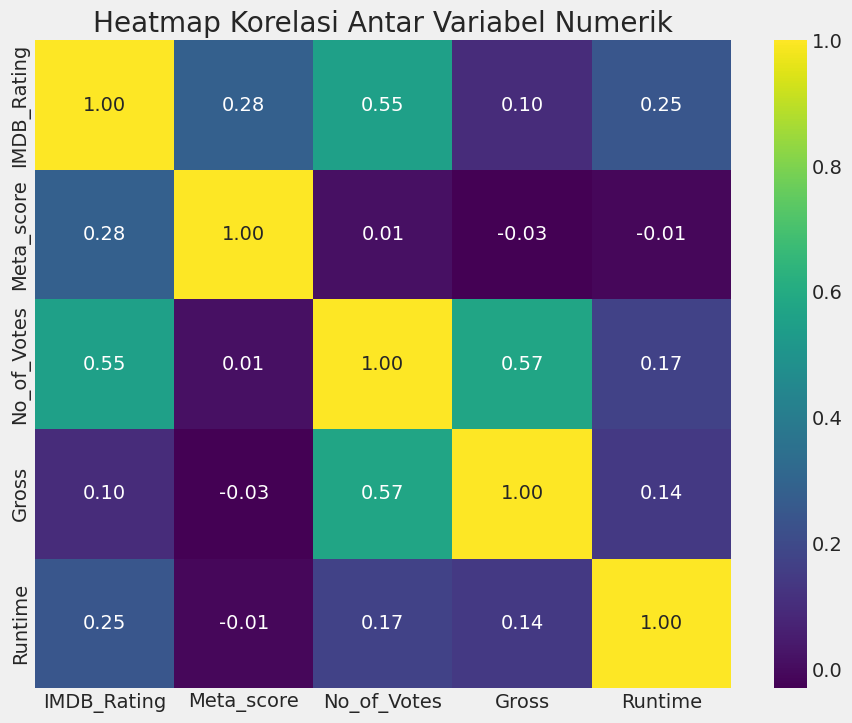

In [10]:
# Gunakan df_gross_cleaned untuk memasukkan Gross ke dalam korelasi
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
correlation_matrix = df_gross_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()